# TIME SERIES EDA

1) Panda Data Reader Library
2) Date Time Index 
3) Time resampling
4) Time shifts
5) Mean Rolling and Expanding
6) Time series Visulization
7) One sample project on Time Series

In [13]:
import pandas_datareader as pdr
import yfinance as yf
import pandas as pd
from datetime import datetime

In [18]:
# Reding Data using pdr
# Ususally we use API key to read data 
# Let suppode I want tesla data 
# pdr is not working so we instlled yahoo linrary for fetching the data 
#df_tesla=pdr.get_data_yahoo("TSLA")
df_tesla = yf.download('TSLA', start='2019-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


The columns in the provided dataset appear to represent various financial metrics related to a stock. Here's an explanation of each column:

1) Date:

This column represents the date of the corresponding financial data.

2) Open:

The opening price of the stock on a given date, i.e., the price of the stock at the beginning of the trading day.

3) High:

The highest price at which the stock traded during the trading day.

4) Low:

The lowest price at which the stock traded during the trading day.

5) Close:

The closing price of the stock on a given date, i.e., the price of the stock at the end of the trading day.

6) Adj Close:

The adjusted closing price takes into account factors such as dividends, stock splits, and other corporate actions. It provides a more accurate reflection of the stock's value over time.

7) Volume:

The trading volume represents the total number of shares traded on a given day. It indicates the level of market activity for that stock on that particular day.

In summary:

Open, High, Low, and Close represent different price points during the trading day.
Adj Close is the adjusted closing price, which accounts for various corporate actions.
Volume indicates the level of market activity in terms of the number of shares traded.
These columns are standard in financial datasets and are commonly used for technical analysis and financial modeling.

In [20]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


<Axes: xlabel='Date'>

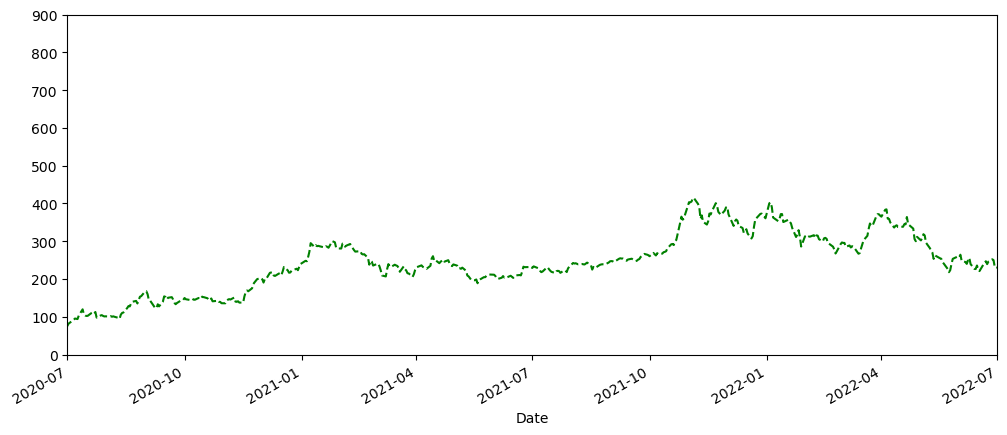

In [38]:
# c=color
#ls is line style
df_tesla['High'].plot(xlim=['2020-07-01','2022-07-01'],ylim=[0,900],figsize=(12,5),c='green',ls='--')

## Observation

Higest Share :  414 on 2021-11-04

Lowest Share : 12.22 on 2019-06-03

In [45]:
# If I want to see these particular rows
index=df_tesla.loc['2020-01-01':'2021-09-01'].index

#If for these particulr rows, If I want to see the open columns
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline

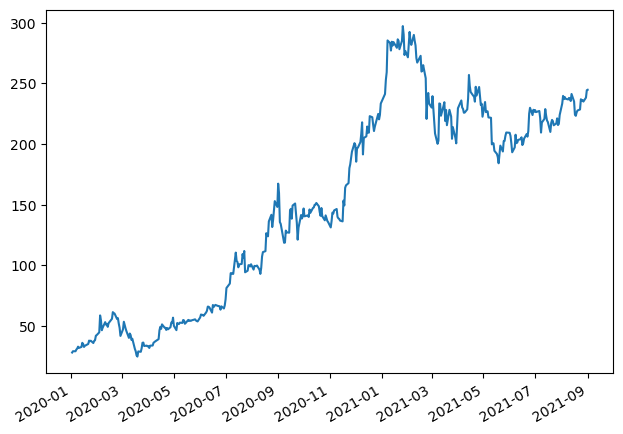

In [52]:
figure,axis=plt.subplots()
plt.tight_layout()
# To prevent overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [63]:
## Date Time Index

df_tesla=df_tesla.reset_index()

If you have date column in your dataset and it is in object format then you have to change it in datetime64[ns] format


Converting into datetime64[ns] format


As now it is already in datetime64[ns] so no ned to convert but .to_datetime command is used  pd.to_datetime(df_tesla['Date'])

In [64]:
# We used resetindex command and if I want to revert it so we use following commands

df_tesla.set_index('Date',drop=True,inplace=True)

In [65]:
from  datetime import datetime

In [82]:
# If You want to know what is date and time right now or how much time command is using to execute then you use this
datetime.now()

datetime.datetime(2024, 2, 5, 14, 49, 31, 993476)

In [91]:
# Let suppose I nitialied the date of today which is 2-5-204
date=datetime(2024,2,5)
#Now If I want to see what is the date on the date I gave
print(date.date())
# what is the day
print(date.day)
#what is the year
print(date.year)
# what is the weekday 0 weekday means monday
print(date.weekday())

2024-02-05
5
2024
0


<function datetime.timetuple>

## Time Resampling

In [92]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


<Axes: xlabel='Date'>

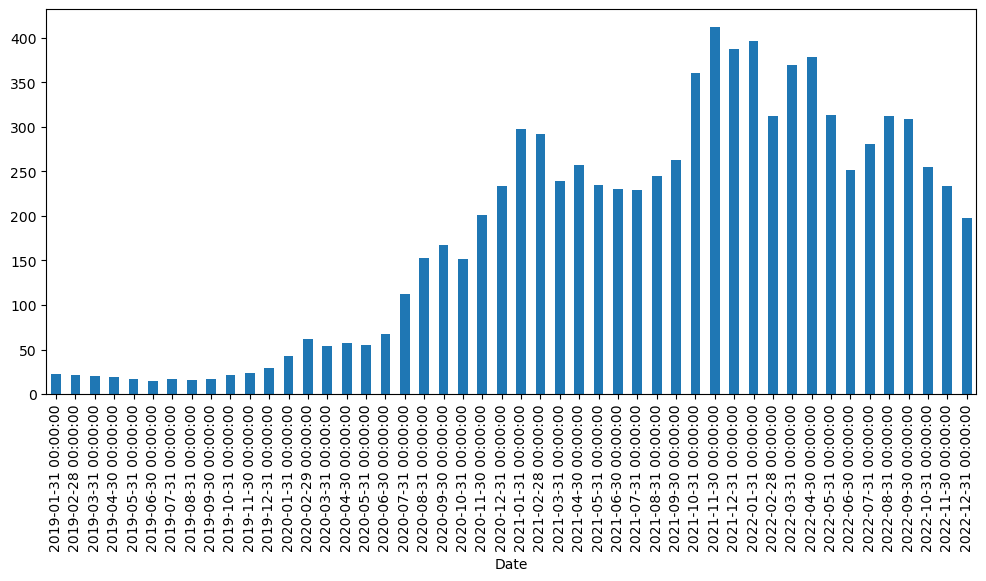

In [112]:
# Now I will use .resample function and in this function there are different rule on which we resample our data. Let suppose I use 'a' right now
df_tesla.resample(rule='Q').min()
# What I did bsically I calculted the minimum highest, lowest, Volume of all year. This rule checked all the year high and then give me on 31st of ech year what is the lowest high. we can do same for max
plt.figure(figsize=(12,5))
df_tesla.resample(rule='M').max()['Open'].plot(kind='bar')

<Axes: xlabel='Date'>

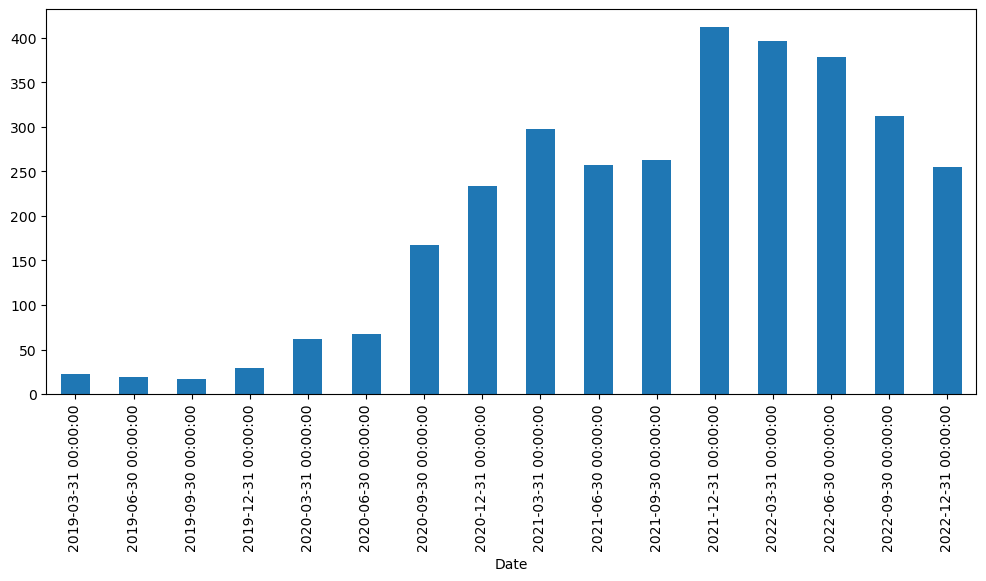

In [113]:
plt.figure(figsize=(12,5))
df_tesla.resample(rule='Q').max()['Open'].plot(kind='bar')

##### RULES

B         business day frequency

C         custom business day frequency (experimental)

D         calendar day frequency

W         weekly frequency

M         month end frequency

SM        semi-month end frequency (15th and end of month)

BM        business month end frequency

CBM       custom business month end frequency

MS        month start frequency

SMS       semi-month start frequency (1st and 15th)

BMS       business month start frequency

CBMS      custom business month start frequency

Q         quarter end frequency

BQ        business quarter endfrequency

QS        quarter start frequency

BQS       business quarter start frequency

A         year end frequency

BA, BY    business year end frequency

AS, YS    year start frequency

BAS, BYS  business year start frequency

BH        business hour frequency

H         hourly frequency

T, min    minutely frequency

S         secondly frequency

L, ms     milliseconds

U, us     microseconds

N         nanoseconds

### Rolling and Expanding


what is rolling?

The rolling method in pandas is used for rolling window calculations on time-series data. It is often used in conjunction with statistical functions to compute metrics over a specified window of observations. The concept of a rolling window involves taking a fixed-size subset of data and applying a function to that subset as it "rolls" or moves through the entire dataset.

When you set the window size to 10 and observe NaN (Not a Number) values for the first 10 values, it is because the rolling window calculation requires a certain number of observations to compute meaningful metrics. Specifically, for the first 9 positions in the rolling window of size 10, there aren't enough preceding values to calculate the specified function, resulting in NaN values.

In [116]:
df_tesla['High'].rolling(10).min().head(20)

Date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
2019-01-09          NaN
2019-01-10          NaN
2019-01-11          NaN
2019-01-14          NaN
2019-01-15    20.626667
2019-01-16    20.626667
2019-01-17    21.200001
2019-01-18    21.808666
2019-01-22    20.533333
2019-01-23    19.633333
2019-01-24    19.578667
2019-01-25    19.578667
2019-01-28    19.578667
2019-01-29    19.578667
2019-01-30    19.578667
Name: High, dtype: float64

In [117]:
df_tesla['High'].head(20)

Date
2019-01-02    21.008667
2019-01-03    20.626667
2019-01-04    21.200001
2019-01-07    22.449333
2019-01-08    22.934000
2019-01-09    22.900000
2019-01-10    23.025999
2019-01-11    23.227333
2019-01-14    22.833332
2019-01-15    23.253332
2019-01-16    23.466667
2019-01-17    23.433332
2019-01-18    21.808666
2019-01-22    20.533333
2019-01-23    19.633333
2019-01-24    19.578667
2019-01-25    19.901333
2019-01-28    19.830667
2019-01-29    19.903999
2019-01-30    20.600000
Name: High, dtype: float64

In [118]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

<Axes: xlabel='Date'>

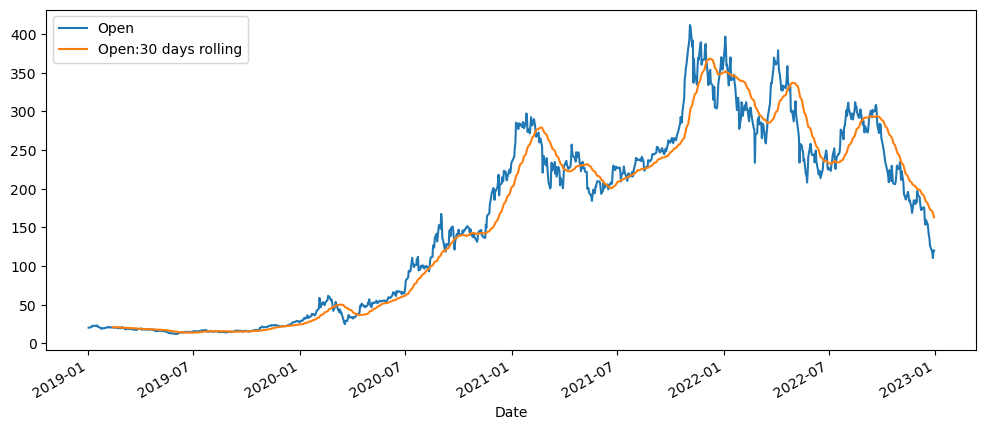

In [119]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))